# Capacity and Generation Bar Chart
---

In [1]:
import io
from contextlib import redirect_stdout
import matplotlib.pyplot as plt
import pandas as pd

from postreise.plot.analyze_pg import AnalyzePG as apg
from powersimdata.scenario.scenario import Scenario 

The function below returns the total generation and capacity by fuel type for a given scenario.

In [2]:
def do_chart_analysis(data, time, zones):
    f = io.StringIO()
    with redirect_stdout(f):
        chart = apg(data, time, zones,
                    ["nuclear", "hydro", "coal", "ng", "solar", "wind"],
                    "chart", normalize=False)
    chart.get_plot(save=False)
    data_chart = chart.get_data()
    print("----------------------------------------")
    for z in zones:
        print("Total Generation in %s: %d MWh" % (z, round(data_chart[z]['Generation'].sum().sum())))
        print("Total Capacity in %s: %d MW" % (z, round(data_chart[z]['Capacity'].sum())))
        print("----------------------------------------")

Here, We consider our *2020 base scenario*. This is the scenario presented in the scrolly telling on our webpage: https://science.breakthroughenergy.org/

In [3]:
scenario = Scenario("824")

SCENARIO: Julia | USABase_2020_Anchor_profile_fix_1

--> State
analyze
--> Loading grid
Loading bus
Loading plant
Loading heat_rate_curve
Loading gencost_before
Loading gencost_after
Loading branch
Loading dcline
Loading sub
Loading bus2sub
--> Loading ct


## Bar Charts
Bar charts are produced for both generation and capacity for all three interconnections

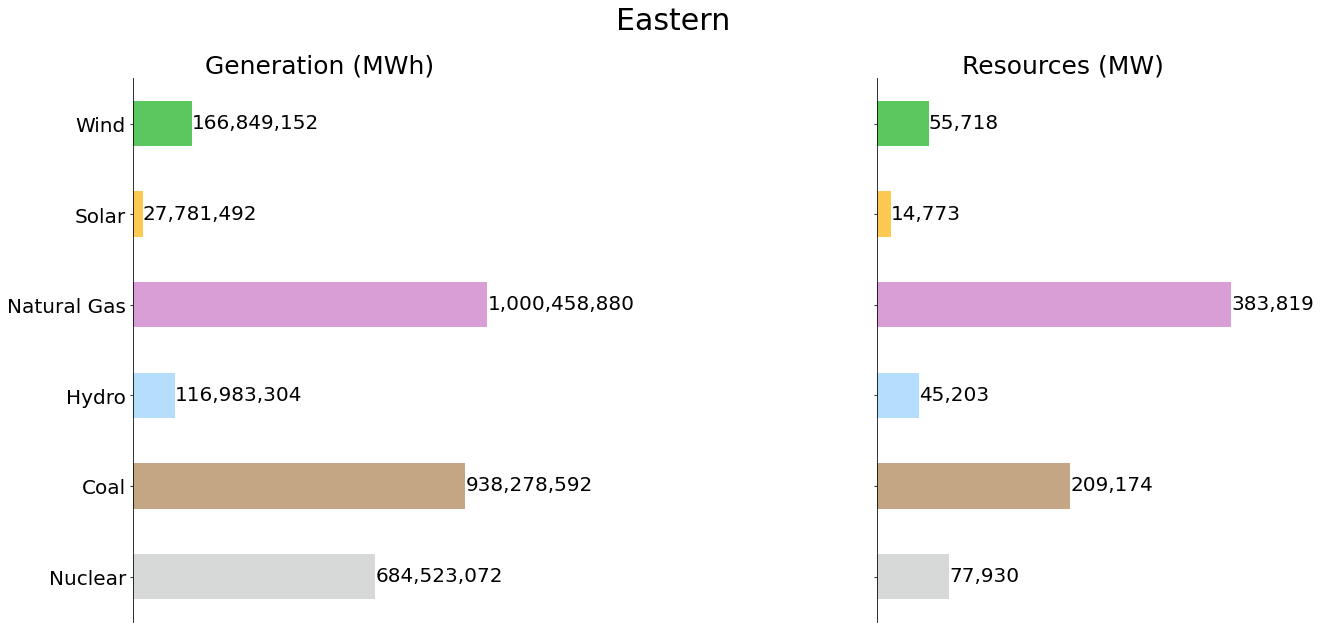

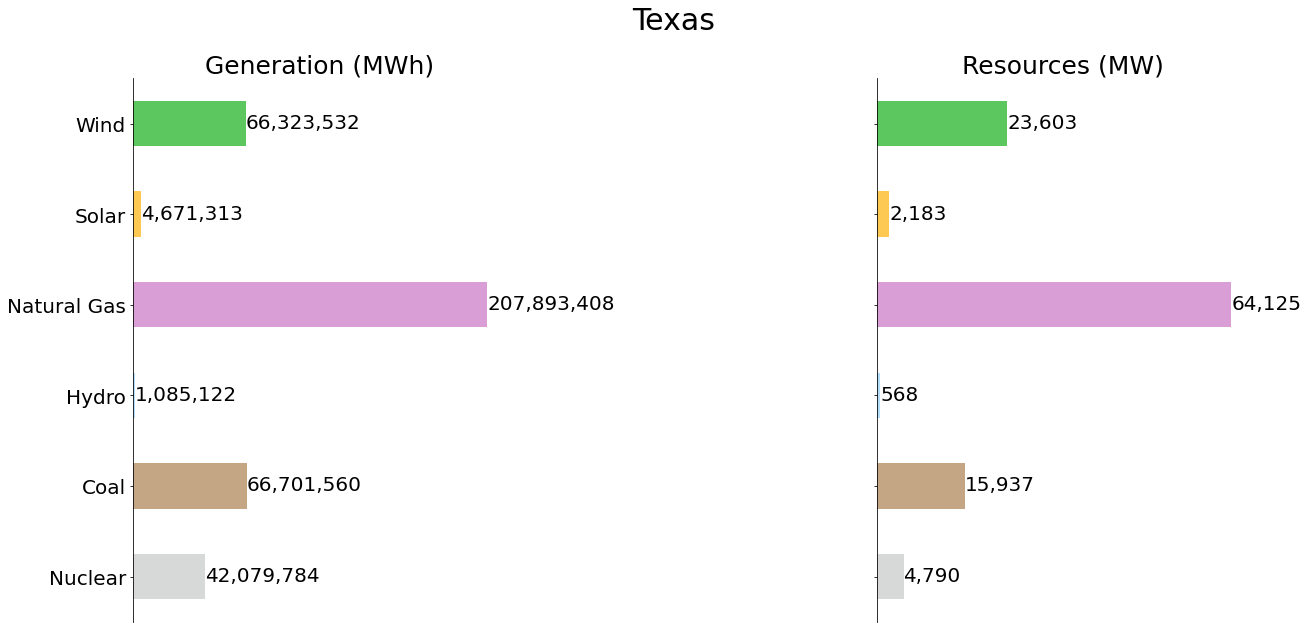

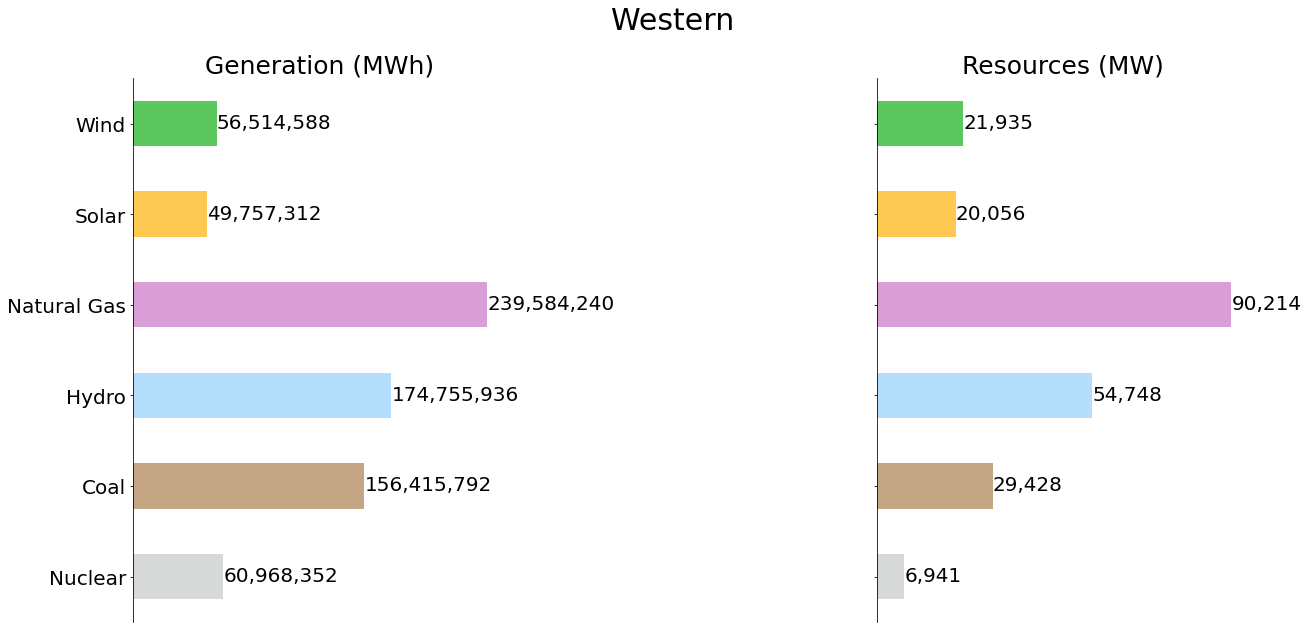

----------------------------------------
Total Generation in Eastern: 2934874112 MWh
Total Capacity in Eastern: 786621 MW
----------------------------------------
Total Generation in Texas: 388754720 MWh
Total Capacity in Texas: 111208 MW
----------------------------------------
Total Generation in Western: 737996160 MWh
Total Capacity in Western: 223324 MW
----------------------------------------


In [4]:
time = ("2016-01-01-00", "2016-12-31-23", "utc", "H")
do_chart_analysis(scenario, time, ["Eastern", "Texas", "Western"])